In [1]:
import requests
import time

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
driver = webdriver.Chrome()

In [35]:
url = 'https://instruction.learn.co/staff/students'
driver.get(url)

In [37]:
username = driver.find_element_by_xpath('//*[@id="login_field"]')
username.send_keys('')

In [38]:
password = driver.find_element_by_xpath('//*[@id="password"]')
password.send_keys('Jeff3311')

In [39]:
sign_in = driver.find_element_by_xpath('//*[@id="login"]/form/div[2]/input[8]')
sign_in.click()

In [7]:
# click view students to get to the students section
view = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div[1]/div/div[2]/a')
view.click()

In [8]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [14]:
active_students = soup.find('ul', id = 'js-students-active').findAll('li', class_ = 'student')

In [18]:
active_students.find_all('a')

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [19]:
active_url = []
active_name = []
for student in active_students:
    x = student.find('a')
    print(x['href'] + ' - ' + x.text)
    active_url.append(x['href'])
    active_name.append(x.text)

/staff/students/deannalinn - a a
/staff/students/a-glazer - A Glazer
/staff/students/akizzles - A K
/staff/students/osrsnub - Aaron Cherniavsky
/staff/students/aaronc1546 - Aaron Christensen
/staff/students/afeinberg22 - Aaron Feinberg
/staff/students/aamax67 - Aaron Lieberman
/staff/students/aparkening - Aaron Parkening
/staff/students/codingsensei19 - Aaron Wilson
/staff/students/abogailo - Abagail Hudson
/staff/students/abadi230 - Abdullah Bajaman
/staff/students/asafi1997 - Abdul Tawab Ajmal  Safi
/staff/students/4227 - Abel Birhanu
/staff/students/4711 - Abigail Kimbler
/staff/students/softwaree40 - Abiodun   [Wale] Ajagunna
/staff/students/ag212 - Abraham Galva
/staff/students/jdiaz28 - Abraham Moreno
/staff/students/coachcooz - Acusio Bivona
/staff/students/adamcbassett - Adam Bassett
/staff/students/adchang91 - Adam Chang
/staff/students/amcooper - Adam Cooper
/staff/students/adogthewarrior - Adam Fudge
/staff/students/mathycoder - Adam S
/staff/students/aschonely83 - Adam Scho

/staff/students/maharvey2 - Mark Harvey
/staff/students/mhern1415 - Mark Hernandez
/staff/students/mkanko - Mark Kanko
/staff/students/cleansolllc - Mark May
/staff/students/legomyrego - Mark Rego
/staff/students/markwesley - Mark Stone
/staff/students/markpnoi26 - Mark Daniel  Delgado
/staff/students/aruande - Marrio Hinkle
/staff/students/marsbhoward - Mars Howard
/staff/students/hpmarsle - Mars Le
/staff/students/mmmeyers - Marsi Meyers-Miyashita
/staff/students/mchaplin44 - Martin Chaplin
/staff/students/martinmoy - Martin Moy
/staff/students/martynas-v - Martynas Verbusaitis
/staff/students/maryarbs - Mary Arbachauskas
/staff/students/miyekay94 - Mary Kanu
/staff/students/mashapie23 - Masha Podgorbunskikh
/staff/students/mashqalaoshi - mashur.hossain
/staff/students/masonellwood - Mason Ellwood
/staff/students/mat0829 - Mat Anderson
/staff/students/mgavish - Matan Gavish
/staff/students/menach123 - Mathew Menachery
/staff/students/matoyawilliams - Matoya Williams
/staff/students/4

In [20]:
active_df = pd.DataFrame({'name': active_name,
                            'url': active_url})

In [21]:
active_df.head()

,name,url
0,a a,/staff/students/deannalinn
1,A Glazer,/staff/students/a-glazer
2,A K,/staff/students/akizzles
3,Aaron Cherniavsky,/staff/students/osrsnub
4,Aaron Christensen,/staff/students/aaronc1546


In [29]:
def get_info(url_part2):
    driver.get('https://instruction.learn.co' + url_part2)
    time.sleep(2)
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')
    program = soup.findAll('h3', class_ = 'uk-card-title uk-margin-remove-bottom')[1].text.strip()
    start_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Educational')
    stop_ed_coach = soup.findAll('div', class_ = 'uk-card-body')[1].text.find('Maximum')
    my_str = soup.findAll('div', class_ = 'uk-card-body')[1].text[start_ed_coach:stop_ed_coach]
    ed_coach_taken = [int(s) for s in my_str.split() if s.isdigit()][0]
    try:
        ed_coach_avail = [int(s) for s in my_str.split() if s.isdigit()][1]
    except IndexError:
        ed_coach_avail = ''
    cohort = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[0].text
    pacing = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[1].text
    try:
        past_cohorts = soup.findAll('div', class_ = 'uk-card-body')[1].findAll('div')[2].text
    except IndexError:
        past_cohorts = ''
    learn_link = soup.find('div', class_ = 'custom-badges').findAll('a', class_ = 'custom-badge-icon')[1]['href']
    return program, ed_coach_taken, ed_coach_avail, cohort, pacing, past_cohorts, learn_link

In [41]:
prog_list = []
ed_coach_used_list = []
ed_coach_avail_list = []
cohort_list = []
pacing_list = []
past_cohorts_list = []
learn_list = []
for index, x in enumerate(active_df['url']):
    prog_elem, ed_elem1, ed_elem2, cohort_elem, pacing_elem, past_elem, learn_elem = get_info(x)
    prog_list.append(prog_elem)
    ed_coach_avail_list.append(ed_elem1)
    ed_coach_used_list.append(ed_elem1)
    cohort_list.append(cohort_elem)
    pacing_list.append(pacing_elem)
    past_cohorts_list.append(past_elem)
    learn_list.append(learn_elem)
    if (index % 5 == 0) & index > 0:
        print(f'Completed {index} out of {len(active_df["url"])}')
        df_saved = pd.DataFrame()
        df_saved['program'] = prog_list
        df_saved['cohort'] = cohort_list
        df_saved['pacing'] = pacing_list
        df_saved['past_cohorts'] = past_cohorts_list
        df_saved['ed_coach_used'] = ed_coach_used_list
        df_saved['ed_coach_available'] = ed_coach_avail_list
        df_saved['learn_url'] = learn_list
        df_saved.to_csv('df_saved.csv', index = False)

Completed 5 out of 2365
Completed 15 out of 2365
Completed 25 out of 2365
Completed 35 out of 2365
Completed 45 out of 2365
Completed 55 out of 2365
Completed 65 out of 2365
Completed 75 out of 2365
Completed 85 out of 2365
Completed 95 out of 2365
Completed 105 out of 2365
Completed 115 out of 2365
Completed 125 out of 2365
Completed 135 out of 2365
Completed 145 out of 2365
Completed 155 out of 2365
Completed 165 out of 2365
Completed 175 out of 2365
Completed 185 out of 2365
Completed 195 out of 2365
Completed 205 out of 2365
Completed 215 out of 2365
Completed 225 out of 2365
Completed 235 out of 2365
Completed 245 out of 2365
Completed 255 out of 2365
Completed 265 out of 2365
Completed 275 out of 2365
Completed 285 out of 2365
Completed 295 out of 2365
Completed 305 out of 2365
Completed 315 out of 2365
Completed 325 out of 2365
Completed 335 out of 2365
Completed 345 out of 2365
Completed 355 out of 2365
Completed 365 out of 2365
Completed 375 out of 2365
Completed 385 out of 23

In [42]:
active_df['program'] = prog_list
active_df['cohort'] = cohort_list
active_df['pacing'] = pacing_list
active_df['past_cohorts'] = past_cohorts_list
active_df['ed_coach_used'] = ed_coach_used_list
active_df['ed_coach_available'] = ed_coach_avail_list
active_df['learn_url'] = learn_list

In [43]:
active_df.to_csv('active_df.csv', index = False)

In [2]:
active_df = pd.read_csv('active_df.csv')

In [3]:
active_df.head()

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn
1,A Glazer,/staff/students/a-glazer,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-041519,Pacing: Part Time,Past Cohorts:\n online-web-pt-02111...,1,1,http://learn.co/a-glazer
2,A K,/staff/students/akizzles,Program: Online Web Developer Program,Cohort: v-000,Pacing: Self Paced,NaN,0,0,http://learn.co/akizzles
3,Aaron Cherniavsky,/staff/students/osrsnub,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-100719,Pacing: Part Time,Past Cohorts:\n online-web-sp-000 -...,1,1,http://learn.co/osrsnub
4,Aaron Christensen,/staff/students/aaronc1546,Program: Online Web Developer Program,Cohort: v-000,Pacing: Self Paced,NaN,1,1,http://learn.co/aaronc1546


In [4]:
active_df.shape

(2365, 9)

In [5]:
active_df[active_df['program'].str.contains('Data Science')]['pacing'].value_counts()

Pacing: Self Paced    154
Pacing: Part Time      81
Pacing: Full Time      43
Name: pacing, dtype: int64

In [6]:
active_df[active_df['name'].str.contains('Aaron Feinberg')]

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url
5,Aaron Feinberg,/staff/students/afeinberg22,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,3,3,http://learn.co/afeinberg22


In [7]:
sp_learn = pd.read_csv('sp_learn.csv')

In [8]:
sp_learn.head()

,first_name,last_name,email,github_username,active_track,completion,velocity,last_seen,location,program_type,enrollment_status,enrollment_date,completed_lessons
0,Spencer,Rogers,spencer1248@gmail.com,c7c03ba2-9b24-48bb-b3bb-279365d3d029,Bootcamp Prep v2,7,0,12/21/19,"Boulder, CO, USA",Program not found,NaN,NaN,7
1,Frantz,Lacarriere,frantz@flatironschool.com,FrantzLacarriere,Data Science Career V2,3,0,12/20/19,"New York, NY, USA",Program not found,NaN,NaN,3
2,Alex,Griffith,alexalexgriffith@gmail.com,alexgriff,Data Science Career V2,148,0,11/7/19,"Brooklyn, NY",Program not found,NaN,NaN,148
3,Chloe,Francis,cfrancis275@googlemail.com,crf2907,Data Science Career V2,145,0,3/31/19,New York,NaN,active,9/24/18,144
4,Jennifer,Lavoie,pele3313@gmail.com,JenniferLavoie,Data Science Career V2,24,0,12/17/19,Austin,NaN,active,10/30/19,24


In [9]:
name = f'{sp_learn.loc[0, "first_name"]} {sp_learn.loc[0, "last_name"]}'

In [10]:
name

'Spencer Rogers'

In [11]:
len(active_df[active_df['name'].str.contains('asdfasd')])

0

In [12]:
on_instruct = []
not_instruct = []

for index, row in sp_learn.iterrows():
    name = f'{row["first_name"]} {row["last_name"]}'
    if len(active_df[active_df['name'].str.contains(name)]) > 0:
        on_instruct.append(name)
    else:
        print(name)
        not_instruct.append(name)

Frantz Lacarriere
Alex Griffith
Liz Kalina
Luke Ghenco
Malorie Casimir
Steven Liu
Garry Clerge
Yoyo Chen Flatiron
stevenshoemaker nan
nan nan
fcamuz nan
nan nan
Andrew Wong
Aleigha Sardina-Spevack
Raymond Willey
Alex Govea
Kevin Ortiz
nan nan
Emily Pfeifer
Lucas Kelly
Michael Cheng
Nick Oseland
Kyle Johnson
Abdul Tawab Ajmal  Safi 
Matt Miller
Eli Kim
Kai Luo


In [13]:
len(on_instruct)

148

In [14]:
active_df.head(2)

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn
1,A Glazer,/staff/students/a-glazer,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-041519,Pacing: Part Time,Past Cohorts:\n online-web-pt-02111...,1,1,http://learn.co/a-glazer


In [15]:
active_df.head()

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn
1,A Glazer,/staff/students/a-glazer,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-041519,Pacing: Part Time,Past Cohorts:\n online-web-pt-02111...,1,1,http://learn.co/a-glazer
2,A K,/staff/students/akizzles,Program: Online Web Developer Program,Cohort: v-000,Pacing: Self Paced,NaN,0,0,http://learn.co/akizzles
3,Aaron Cherniavsky,/staff/students/osrsnub,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-100719,Pacing: Part Time,Past Cohorts:\n online-web-sp-000 -...,1,1,http://learn.co/osrsnub
4,Aaron Christensen,/staff/students/aaronc1546,Program: Online Web Developer Program,Cohort: v-000,Pacing: Self Paced,NaN,1,1,http://learn.co/aaronc1546


In [16]:
'A Glazer' not in on_instruct

True

In [17]:
active_df.head(2)

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn
1,A Glazer,/staff/students/a-glazer,Program: Online Software Engineering Bootcamp,Cohort: online-web-pt-041519,Pacing: Part Time,Past Cohorts:\n online-web-pt-02111...,1,1,http://learn.co/a-glazer


In [18]:
sp_ds = active_df[(active_df['program'].str.contains('Data Science')) & 
                  (active_df['pacing'] == 'Pacing: Self Paced')]

In [19]:
sp_ds.shape

(154, 9)

In [20]:
# check students that are on instructor app but not learn
for index, row in sp_ds.iterrows():
    if (row['name'] not in not_instruct): 
        if (row['name'] not in on_instruct):
            print(row['name'])

Abdul Tawab Ajmal  Safi
Elias Saleh
fcamuz
Nayeem Hossain
stevenshoemaker
rvvphd@gmail.com
kvd51@mac.com


In [21]:
sp_ds['curriculum'] = ''
sp_ds['lessons_completed'] = 0
sp_ds['last_lesson'] = ''
sp_ds['start_date'] = ''

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [22]:
driver = webdriver.Chrome()

driver.get('https://instruction.learn.co/staff/students/byeretzian')

In [23]:
driver.get('https://instruction.learn.co/staff/students/byeretzian')

In [24]:
my_html = driver.page_source
soup = BeautifulSoup(my_html, 'html.parser')

In [25]:
soup.find('div', class_ = 'uk-card-body').findAll('p')[-1].text

AttributeError: 'NoneType' object has no attribute 'findAll'

In [28]:
import re

In [91]:
my_date = soup.find('div', class_ = 'uk-card-body').findAll('p')[-1].text

In [93]:
re.search("(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})", my_date)[0]

'10/01/18'

In [29]:
sp_ds.head()

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url,curriculum,lessons_completed,last_lesson,start_date
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn,,0,,
5,Aaron Feinberg,/staff/students/afeinberg22,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,3,3,http://learn.co/afeinberg22,,0,,
11,Abdul Tawab Ajmal Safi,/staff/students/asafi1997,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,0,0,http://learn.co/asafi1997,,0,,
36,Adrian Paz,/staff/students/adpaz,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,1,1,http://learn.co/adpaz,,0,,
57,Akshay Ghalsasi,/staff/students/akshay-ghalsasi,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,0,0,http://learn.co/akshay-ghalsasi,,0,,


In [27]:
import re

In [30]:
# add start date
for index, row in sp_ds.iterrows():
    print(row['name'])
    driver.get('https://instruction.learn.co' + row['url'])
    time.sleep(2)
    
    my_html = driver.page_source
    soup = BeautifulSoup(my_html, 'html.parser')
    
    my_date = soup.find('div', class_ = 'uk-card-body').findAll('p')[-1].text
    date = re.search("(\d{1,4}([.\-/])\d{1,2}([.\-/])\d{1,4})", my_date)[0]
    sp_ds.loc[index, 'start_date'] = date

a a


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Aaron Feinberg
Abdul Tawab Ajmal  Safi
Adrian Paz
Akshay Ghalsasi
Alex Orn
Alexandra Clemm
Ally Hoehn-Saric
Andrew Park
Angie S
Ann M
Anthony Barranco
Aretha Soderstrom
Arseniy Tyurin
Barrett Yeretzian
bert tong
Blair Blumenfeld
Bonny Nichol
Brian Alward
Bronwen C.
Brycen Wong
Caitlin Snyder
Chloe Francis
Chris Gudde
Chris L
Christine Chong
Christopher Grannan
Claire Xu
Cynthia Pedrasa
Daniel Kondratov
Daniel Pak
Daniel Rodriguez
Danyal Andriano
Darren Seibert
David Bartholomew
David Howze
David  Cuervo
Denis Kelly
Devin Sarnataro
Duc-Trung Nguyen
Eduardo Calzadilla
Elaine Pereira Cruz
Elias Saleh
Eric Aniag
Evan Okin
Fanpin Tseng
fcamuz
Gina Durante
Griffin H Stein
Hammad Ali
Haoyang Yu
Harish Kumar
Hunter Sapienza
Igor Kirko
Ishan Shah
J Duncan
Jared Young
Jeffrey Soto
Jennifer Lavoie
Jennifer Lee
Jerome Gutierrez
Joao Bretas
Joe M
Joe Wilkinson
Joehann Guadalupe
John Locke
John Nguyen
Jonathan Bardey
Jonathan Swankie
Jordan Lunak
Joseph Hefley
Joseph Szpigiel
JP Zawatsky
Justin Coll

In [31]:
sp_ds.tail()

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url,curriculum,lessons_completed,last_lesson,start_date
2238,vinicio stort,/staff/students/vstort,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,0,0,http://learn.co/vstort,,0,,02/01/19
2248,Wendy Jiang,/staff/students/jwendyjiang,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n online-ds-ft-041519...,9,9,http://learn.co/jwendyjiang,,0,,10/01/18
2304,Zhaleh Feizollahi,/staff/students/zfeizollahi,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,3,3,http://learn.co/zfeizollahi,,0,,05/07/19
2332,rvvphd@gmail.com,/staff/students/rvvphd,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,1,1,http://learn.co/rvvphd,,0,,10/01/18
2342,kvd51@mac.com,/staff/students/kvd51,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,0,0,http://learn.co/kvd51,,0,,12/12/19


In [32]:
sp_ds['start_date'] = pd.to_datetime(sp_ds['start_date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
sp_ds.head(2)

,name,url,program,cohort,pacing,past_cohorts,ed_coach_used,ed_coach_available,learn_url,curriculum,lessons_completed,last_lesson,start_date
0,a a,/staff/students/deannalinn,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,Past Cohorts:\n v-000 - left on 201...,2,2,http://learn.co/deannalinn,,0,,2018-10-01
5,Aaron Feinberg,/staff/students/afeinberg22,Program: Online Data Science Bootcamp,Cohort: online-ds-sp-000,Pacing: Self Paced,NaN,3,3,http://learn.co/afeinberg22,,0,,2019-04-14


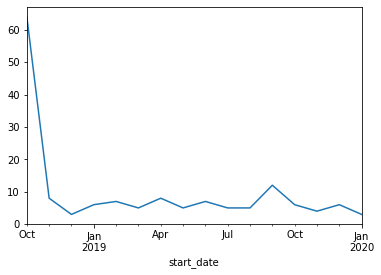

In [34]:
sp_ds.set_index('start_date').resample('m')['name'].count().plot(kind = 'line')
plt.show()

In [41]:
from datetime import date
import numpy as np

In [42]:
sp_ds.loc[0, 'start_date']

Timestamp('2018-10-01 00:00:00')

In [43]:
pd.to_datetime(date.today())

Timestamp('2019-12-22 00:00:00')

In [45]:
int(((pd.to_datetime(date.today()) - sp_ds.loc[0, 'start_date'])/np.timedelta64(1, 'M')))

14

In [47]:
sp_ds['Months in Program'] = ((pd.to_datetime(date.today()) - sp_ds['start_date'])/np.timedelta64(1, 'M'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
sp_ds['Months in Program'] = sp_ds['Months in Program'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
sp_ds.to_csv('sp_ds_months.csv', index = False)

In [54]:
sp_ds = pd.read_csv('sp_ds_months.csv')

In [57]:
sp_ds['start_date'] = pd.to_datetime(sp_ds['start_date'])

In [58]:
sp_ds['Months in Program'] = ((pd.to_datetime(date.today()) - sp_ds['start_date'])/np.timedelta64(1, 'M'))

In [59]:
sp_ds['Months in Program'] = sp_ds['Months in Program'].astype(int)

In [60]:
sp_ds['Months in Program'].value_counts()

14    30
13    20
11    14
12    11
3     10
2     10
7      9
0      9
9      8
6      8
10     7
8      6
5      5
4      4
1      3
Name: Months in Program, dtype: int64

In [61]:
sp_ds.to_csv('sp_ds_months.csv')